## Równanie Bellmana

Na zajęciach wyprowadzone zostało równanie Bellmana:

$$\forall_{s\in S} v_{\pi}(s) = \sum_{a\in A} \pi (a|s) \cdot \sum_{s'\in S, r\in R} p(s',r|s,a)\cdot (r+\gamma\cdot v_{\pi}(s'))$$

gdzie $\pi (a|s)$ oraz $p(s',r|s,a)$ są znane.

Jest to układ $|S|$ równań liniowych z $|S|$ niewiadomymi, który ma jednoznaczne rozwiązanie, gdy $\gamma\in [0,1)$.

Jedną z numerycznych metod rozwiązywania tego układu jest zaczęcie z jakiegokolwiek wektora dla $v_{\pi}^{(0)}(s)$, wstawienie go do prawej strony równań i w ten sposób otrzymanie nowego wektora $v_{\pi}^{(1)}(s)$. Iterowanie tej metody zbiegnie do prawdziwego $v_{\pi}(s)$.

Po zbiegnięciu można wybrać alternatywną politykę $\pi'$ taką, że jest ona zachłanna względem $v_{\pi}(s)$. Będzie ona na pewno lepsza, czyli $\pi' \ge \pi$. Jeśli będzie $\pi' = \pi$, to znaczy, że algorytm się zakończył i mamy $\pi = \pi^*$, czyli znaleźliśmy optymalną politykę dla danego środowiska.

Powyższy algorytm nazywa się **Programowanie Dynamiczne**.

(c, 5 pkt) Mamy $s \in \{1, 2, \ldots , 98, 99\}$ PLN. Jeśli będziemy mieli $100$, to agent dostaje +10. W każdym innym przypadku agent dostaje 0. Gra kończy się gdy mamy $0$, albo $100$ PLN. Agent może w jednym kroku postawić na szali dowolną liczbę złotych, ale nie mniej niż 1 i nie więcej niż posiada. Szansa wygranej jest $p$, która jest parametrem. Zbadaj $p=0.4$ (strona 84 w książce) oraz $p=0.9$.

Jaka jest optymalna strategia grania? Zwizualizuj, rysując wykres słupkowy, gdzie na osi OX jest liczba posiadanych pieniędzy, a na osi OY wartość, którą agent powinien postawić. Czy wynik zależy od $\gamma$? Jeśli tak / nie, to dlaczego? Zinterpretuj.


In [1]:
import numpy as np

Stany:
- $s=0$ - przegrana
- $s=100$ - wygrana
- $s\in \{1, 2, \ldots , 98, 99\}$ - stan pośredni
- $s\in \{0, 1, \ldots , 98, 99, 100\}$ - wszystkie stany

Akcje:
- $a\in \{1, 2, \ldots , min(s, 50, 100-s)\}$ - stawka, bo więcej niż 50 nie ma sensu stawiać

Nagrody:
- $r=0$ - $s \in \{0, 1, \ldots , 98, 99\}$ 
- $r=10$ - $s=100$

In [52]:
gamma=1
p=0.4
# numbers from 0 to 100 do it without numpy
states = list(range(101))
win_state=100; lose_state=0;

def available_actions(s): # ograniczam trochę polityki, bo inne akcje są bez sensu
    return np.arange(1, min(s,100-s, 50)+1)

def reward(next_state): # nagroda powinna być na podstawie następnego statu
    if next_state == 100:
        return 10
    else:
        return 0

def available_next_states(s, a):
    return [s+a, s-a]

def transition_probability(s, a, next_s):
    if next_s == s+a:
        return p
    elif next_s == s-a:
        return 1-p
    else:
        return 0

V_s = [0]*101
policy = [0]*101

def update_v_bellman(s, policy): #???
    best_action = policy[s]
    best_action_value = float("-inf")
    for a in available_actions(s):
        action_value = 0
        for next_s in available_next_states(s, a):
            action_value += transition_probability(s, a, next_s) * (reward(next_s) + gamma * V_s[next_s])
        if action_value > best_action_value:
            best_action_value = action_value
            best_action = a
    V_s[s] = best_action_value
    policy[s] = best_action
    return V_s, policy

for _ in range(1000):
    # without 0 and 100
    for s in states[1:-1]:
        V_s, policy = update_v_bellman(s, policy)
    # reverse
    #for s in states[-2:0:-1]:
    #    V_s, policy = update_v_bellman(s, policy)
        
# print policy and V_s with numbers
for s in states:
    print(f"state: {s}, policy: {policy[s]}, V_s: {V_s[s]}")

state: 0, policy: 0, V_s: 0
state: 1, policy: 1, V_s: 0.020656247765443163
state: 2, policy: 2, V_s: 0.051640619413607904
state: 3, policy: 3, V_s: 0.09225471067793889
state: 4, policy: 4, V_s: 0.12910154853401976
state: 5, policy: 5, V_s: 0.17385398981324285
state: 6, policy: 6, V_s: 0.23063677669484722
state: 7, policy: 7, V_s: 0.27814113056270545
state: 8, policy: 8, V_s: 0.3227538713350494
state: 9, policy: 9, V_s: 0.37685072795366437
state: 10, policy: 10, V_s: 0.43463497453310707
state: 11, policy: 11, V_s: 0.5035446998069344
state: 12, policy: 12, V_s: 0.576591941737118
state: 13, policy: 12, V_s: 0.652393748659266
state: 14, policy: 14, V_s: 0.6953528264067635
state: 15, policy: 15, V_s: 0.7443123938879459
state: 16, policy: 16, V_s: 0.8068846783376235
state: 17, policy: 8, V_s: 0.8661104367721988
state: 18, policy: 7, V_s: 0.9421268198841608
state: 19, policy: 6, V_s: 1.0314362491955598
state: 20, policy: 5, V_s: 1.0865874363327677
state: 21, policy: 4, V_s: 1.1596662620633194

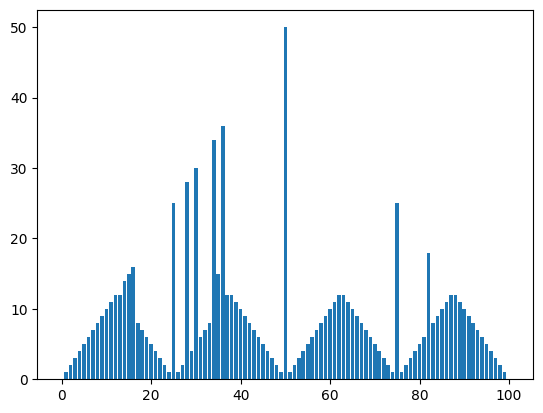

In [53]:
import matplotlib.pyplot as plt
plt.bar(states, policy)
plt.show()

In [58]:
print(available_actions(5))

[1 2 3 4 5]


In [ ]:
def bellman(p, gamma, n=100):
    v = np.zeros(n+1)
    for s in range(1, n):
        v[s] = max([p * (v[s+a] if s+a < n else 10) + (1-p) * (v[s-a] if s-a > 0 else 0) for a in range(1, s+1)])
    return v